# Assignment 4 - Linear Regression

In this assignment, we will start with utilizing Sci-Kit learn to implement a linear regression model. Afterwards, we will be dropping Sci-Kit learning and implementing these algorithms from scratch without the use of machine learning libraries. While you would likely never have to implement your own linear regression algorithm from scratch in practice, such a skill is valuable to have as you progress further into the field and find many scenarios where you actually may need to perform such implementations manually. Additionally, implementing algorithms from scratch will help you better understand the underlying mathematics behind each model.     

## Import Libraries

We will be using the following libraries for this homework assignment. For the questions requiring manual implementation, the pre-existing implementations from Sci-Kit Learn should *not* be used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## Preparing Data

The file named **dataset1.csv** includes data that was generated from an n-degree polynomial with some gaussian noise. The data has 2 columns - first column is the feature (input) and the second column is its label (output). The first step is to load the data and split them into training, validation, and test sets. A reminder that the purpose of each of the splitted sets are as follows:

* **Training Set**: The sample of data used to fit the model
* **Validation Set**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
* **Test Set**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In the section below, we load the csv file and split the data randomnly into 3 equal sets. 

*Note that in practice, we usually aim for around a 70-20-10 split for train, valid, and test respectively, but due to limited data in our case, we will do an even split in order to have sufficient data for evaluation* 

In [2]:
# Load the data and split into 3 equal sets
data = pd.read_csv('./dataset/dataset1.csv', header=None)
#print(data)
data = data.iloc[:, :-1]
#print(data)
train, valid, test = np.split(data, [int(.33*len(data)), int(.66*len(data))])

# We sort the data in order for plotting purposes later
train.sort_values(by=[0], inplace=True)
valid.sort_values(by=[0], inplace=True)
test.sort_values(by=[0], inplace=True)

Let's take a look at what our data looks like

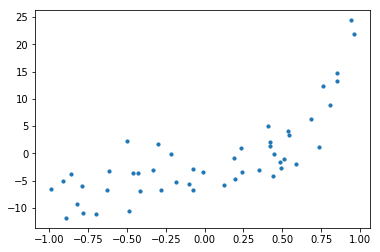

In [3]:
plt.scatter(train[0], train[1], s=10)
plt.show()

Let's apply a linear regression model using Sci-Kit learn and see what the results look like.

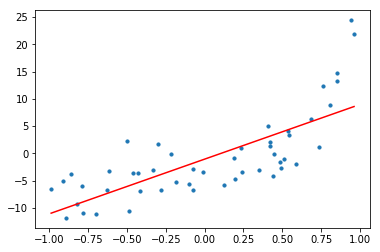

[10.00958322]


In [5]:
# Reshape arrays since sci-kit learn only takes in 2D arrays
train_x = np.array(train[0])
train_y = np.array(train[1])
valid_x = np.array(valid[0])
valid_y = np.array(valid[1])
train_x = train_x.reshape(-1, 1)
train_y = train_y.reshape(-1, 1)
valid_x = valid_x.reshape(-1, 1)
valid_y = valid_y.reshape(-1, 1)

# Apply linear regression model
model = LinearRegression()
model.fit(train_x, train_y)
y_pred = model.predict(train_x)

# Plot the results
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_pred, color='r')
plt.show()
print((y_pred[1]-y_pred[0])/(train_x[1]-train_x[0]))

By analyzing the line of best fit above, we can see that a straight line is unable to capture the patterns of the data. This is an example of underfitting. As seen in the latest lecture, we can generate a higher order equation by adding powers of the original features as new features. 

The linear model,: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $y(x)$ = $w_1 x$ + $w_0$ ** 

can be transformed to a polynomial model such as:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $y(x)$ = $w_2 x^2$ + $w_1 x$ + $w_0$ ** 

Note that this is still considered to be linear model as the coefficients/weights associated with the features are still linear. x<sup>2</sup> is only a feature. However the curve that we would be fitting in this case is quadratic in nature.

Below we show an example of a quadratic curve being fit to the data

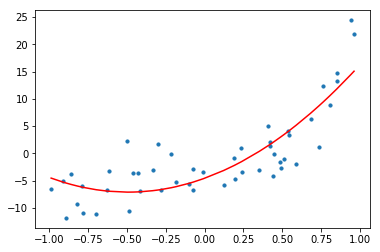

In [6]:
# Create polynomial features with degree 2
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(train_x)
# Apply linear regression
model = LinearRegression()
model.fit(x_poly, train_y)
y_poly_pred = model.predict(x_poly)
# Plot the results
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_poly_pred, color='r')
plt.show()

As you can see, we get a slightly better fit with a quadratic curve. Let's use the model to make predictions on our validation set and compute the mean squared error, which is the error which we wish to minimize.

Mean Squared Error: 20.485214511024232


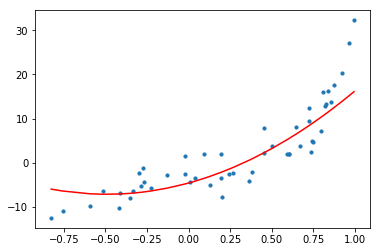

In [7]:
# Make predictions using pretrained model
valid_y_poly_pred = model.predict(polynomial_features.fit_transform(valid_x))

# Calculate root mean squared error
mse = mean_squared_error(valid_y, valid_y_poly_pred)
print("Mean Squared Error: {}".format(mse))

# Plot the prediction results
plt.scatter(valid_x, valid_y, s=10)
plt.plot(valid_x, valid_y_poly_pred, color='r')
plt.show()

## Question 1: Polynomial Regression Using Sci-Kit Learn

Now it is your turn! Following the same format as above, implement a 10-degree polynomial regression model on the training data and plot your results. Use your model to predict the output of the validation set and calculate the mean square error. Report and plot the results. 

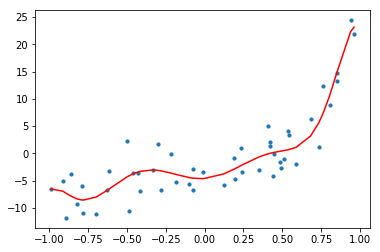

Mean Squared Error: 13.115190778263571


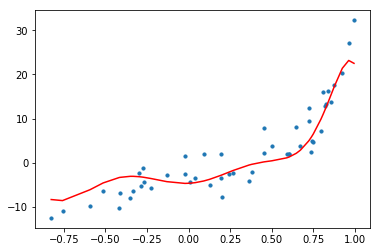

In [8]:
### YOUR CODE HERE - Fit a 10-degree polynomial using Sci-Kit Learn
polynomial_features_10=PolynomialFeatures(degree=10)
x_poly_10=polynomial_features_10.fit_transform(train_x)
model=LinearRegression()
model.fit(x_poly_10,train_y)
y_poly_pred_10=model.predict(x_poly_10)
### YOUR CODE HERE - Plot your the curve on the training data set
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_poly_pred_10, color='r')
plt.show()
### YOUR CODE HERE - Use model to predict output of validation set
validate_y_10=model.predict(polynomial_features_10.fit_transform(valid_x))
plt.scatter(valid_x,valid_y,s=10)
plt.plot(valid_x,validate_y_10, color='r')
### YOUR CODE HERE - Calculate the RMSE. Report and plot the curve on the validation set.
mse_10 = mean_squared_error(valid_y, validate_y_10)
print("Mean Squared Error: {}".format(mse_10))

In [9]:
#test bench
y_poly_pred_10

array([[-6.52408166e+00],
       [-6.92019152e+00],
       [-7.23996419e+00],
       [-7.84149055e+00],
       [-8.35819350e+00],
       [-8.53496961e+00],
       [-8.55337711e+00],
       [-8.00002094e+00],
       [-6.77376052e+00],
       [-6.57897605e+00],
       [-4.28913736e+00],
       [-4.13184989e+00],
       [-3.72016207e+00],
       [-3.39566069e+00],
       [-3.28926520e+00],
       [-3.03861488e+00],
       [-3.11314411e+00],
       [-3.18575286e+00],
       [-3.61778427e+00],
       [-3.84856078e+00],
       [-4.43612248e+00],
       [-4.53130538e+00],
       [-4.54206687e+00],
       [-4.62765044e+00],
       [-3.77245595e+00],
       [-2.87019951e+00],
       [-2.82334494e+00],
       [-2.25640197e+00],
       [-2.16071191e+00],
       [-6.19042760e-01],
       [-6.50536056e-02],
       [ 3.78810801e-04],
       [ 2.09289055e-02],
       [ 1.51295350e-01],
       [ 1.91136163e-01],
       [ 3.97056887e-01],
       [ 4.10838088e-01],
       [ 5.13620327e-01],
       [ 6.6

#### Did the root mean squared error go up or down as compared to the 2-degree polynomial curve? Why do you think this is the case?

------- ANSWER HERE -----------
Went down, because it's well fit.

Now repeat the above for a 20-degree polynomial regression model.

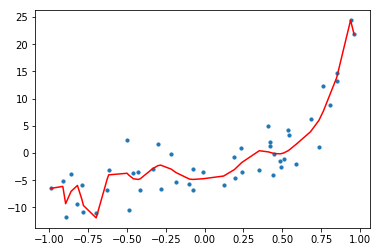

Mean Squared Error: 106.08567998281706


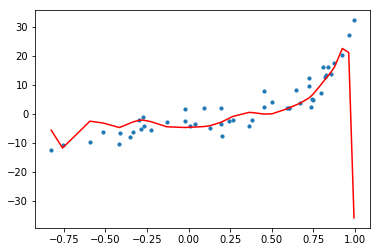

In [10]:
### YOUR CODE HERE - Fit a 20-degree polynomial using Sci-Kit Learn
polynomial_features_20=PolynomialFeatures(degree=20)
x_poly_20=polynomial_features_20.fit_transform(train_x)
model=LinearRegression()
model.fit(x_poly_20,train_y)
y_poly_pred_20=model.predict(x_poly_20)
### YOUR CODE HERE - Plot your the curve on the training data set
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_poly_pred_20, color='r')
plt.show()
### YOUR CODE HERE - Use model to predict output of validation set
validate_y_20=model.predict(polynomial_features_20.fit_transform(valid_x))
plt.scatter(valid_x,valid_y,s=10)
plt.plot(valid_x,validate_y_20, color='r')
### YOUR CODE HERE - Calculate the RMSE. Report and plot the curve on the validation set.
mse_20 = mean_squared_error(valid_y, validate_y_20)
print("Mean Squared Error: {}".format(mse_20))

#### How does the mean square error compare to the previous two models? Why do you think this is the case?

-------- ANSWER HERE -----------

Overfit. Went up a lot. 

## Question 2: Manual Implementation

Now it's time to appreciate the hard work that open source developers have put, in order to allow you to implemenent machine learning models without doing any math! No more Sci-Kit learn (or any other libraries like Tensorflow, Pytorch, etc) for the rest of this assignment!

Your first step is to fit a **10-degree polynomial** to the dataset we have been using above. Then using your results, calculate the mean squared error on both the training and validation set. You may use general utility libraries like numpy and pandas matrix computations and data manipulation, but pre-existing implementations of the model itself is prohibited.

A reminder that in polynomial regression, we are looking for a solution for the equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $Y(X)$ = $W^T$ * $\phi(X)$ ** 

where

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $\phi(X)$ = [ $1$, $X$, $X^2$, $X^3$, ..... $X^n$ ] **
 
and the ordinary least square solution in closed form is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;** $W$ = $(X^T X)^{-1}X^TY$ **

Make sure to review the slides, do some research, and/or ask for clarification if this doesn't make sense. You must understand the underlying math before being able to implement this properly.

*Suggestion - Use the original pandas dataframes variables named train, valid, and test instead of the reshaped arrays that were used specifically for Sci-Kit Learn. It will make your computations cleaner and more inuitive.*

In [11]:
### YOUR CODE HERE - Create the polynomial matrix ϕ(X)
train.sort_values(by=[0], inplace=True)
valid.sort_values(by=[0], inplace=True)
test.sort_values(by=[0], inplace=True)
train_x=np.array(train[0])
train_y=np.array(train[1])
#equiv of fit_and_transform
def phi(X,degree=1):
    phi_fit=np.array([np.power(X,d) for d in range(degree+1)]).T
    return phi_fit
### YOUR CODE HERE - Find the weighted matrix W
#equiv of fit
def get_w(X,Y):
    return np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))
### YOUR CODE HERE - Make predictions on the training set and calculate the root mean squared error. Plot the results.
#equiv of predict
def predict_y(w,phi_X):
    return np.dot(phi_X,w)
#Lemme explain here: for numpy, a 1D arr is a (m,0) array, not a (0,n) array. Therefore, no need to transpose W. When one "transposes" it with magic code vec.reshape((-1, 1)), it will result a (m,1) array
#equiv of fit_and_transform+fit
def fit(X,Y,degree=1):
    phi_x=phi(X,degree)
    w=get_w(phi_x,Y)
    return (phi_x,w)

def MSE(Y_real,Y_pred):
    mse=((Y_real-Y_pred)**2).mean()
    return mse



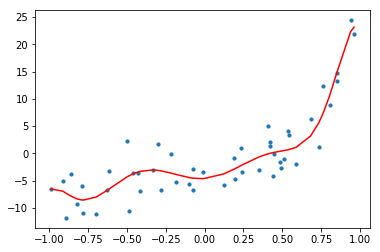

MSE: 8.600664


In [13]:
### Processing: 
phi_x,w_hat=fit(train_x,train_y,10)
pred_y=predict_y(w_hat,phi_x)
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, pred_y, color='r')
plt.show()
mse=MSE(train_y,pred_y)
print('MSE: %lf'%(mse))

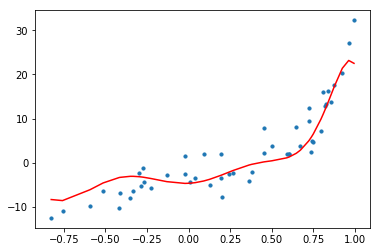

MSE: 13.115191


In [14]:
### YOUR CODE HERE - Make predictions on the validation set and calculate the mean squared error. Plot the results.
valid_x=np.array(valid[0])
valid_y=np.array(valid[1])
pred_valid_y=predict_y(w_hat,phi(valid_x,10))
plt.scatter(valid_x, valid_y, s=10)
plt.plot(valid_x, pred_valid_y, color='r')
plt.show()
mse_valid=MSE(valid_y,pred_valid_y)
print('MSE: %lf'%(mse_valid))

For the rest of the assignment, we will use the other dataset named **dataset2.csv**. First load the csv and split the model into train, valid, and test sets as shown earlier in the assignment.

In [63]:
# Load the data and split into 3 sets ##Nope I'm separating it in 2 sets. 
data2 = pd.read_csv('./dataset/dataset2.csv', header=None)
#print(data)
data2 = data2.iloc[:, :-1]
#print(data)
train2, test2 = np.split(data2, [int(.80*len(data2))])

# We sort the data in order for plotting purposes later
train2.sort_values(by=[0], inplace=True)
test2.sort_values(by=[0], inplace=True)

Plot the data below to see what it looks like

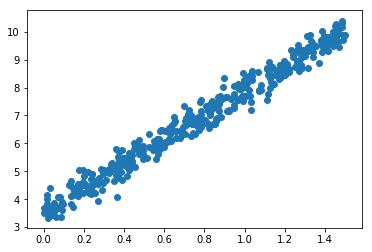

In [64]:
### YOUR CODE HERE - Plot the points for dataset2
plt.scatter(train2[0],train2[1])
plt.show()

If done properly, you should see that the points fall under a relatively straight line with minor deviations. Looks like a perfect example to implement a linear regression model using the **gradient descent** method ..... without the use of any machine learning libraries!

Since the data falls along a straight line, we can assume the solution follows the form:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $y(x)$ = $m x$ + $b$ **

A reminder that in gradient descent, we essentially want to iteratively get closer to the minimum of our objective function (the mean squared error), such that:
 
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** MSE($w_0$) > MSE($w_1$) > MSE($w_2$) > ...**

The algorithm is as follows:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** 1) Pick initial $w_0$ randomnly. **

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** 2) For $k=1,2..$ $\Rightarrow$ $w_{k+1}$ = $w_k$ - $\alpha$  $g(w_k)$  where $\alpha > 0$ is the learning rate and $g(w_k)$ is the gradient. **

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** End when | $w_k$ + $1$ - $w_k$ | < $\epsilon$ **


Make sure to review the slides, do some research, and/or ask for clarification if this doesn't make sense. There are many resources online for gradient descent. You must understand the underlying math before being able to implement this properly.

Now once you understand, it is time to implement the gradient descent below. You may set the learning rate to 1e-6 or whatever value you think is best. As usual, calculate the mean squared error and plot your results. This time, training should be done using the training and validation sets, while the final mean squared error should be computed using the testing set.

In [149]:
### YOUR CODE HERE - Implement gradient decent
train2_x=np.array(train2[0])
train2_y=np.array(train2[1])
#1- pick initial w0 randomly, set learning rate, set error. 
"""randi1=rd.randint(0,len(train2_x))
randi2=rd.randint(0,len(train2_x))"""
"""
w=0
b=0
l_r=0.0005
error=0.00001
print(w)
diff=1
"""
l_r=.1
error=1e-6
#in practice : check with a double for loop 

In [150]:
def g_w(Y_real,w,b,X_real):
    return ((Y_real-(w*X_real+b))*X_real*(-2)).mean()
def g_b(Y_real,w,b,X_real):
    return ((Y_real-(w*X_real+b))*(-2)).mean()

In [151]:
def fit(l_r,error,X,y):
    w=0
    b=0
    diff=1
    while diff>error :
        w_prec=w
        w=w-l_r*g_w(y,w,b,X)
        b=b-l_r*g_b(y,w,b,X)
        diff=abs(w-w_prec)
    return (w,b)

In [152]:
w,b=fit(l_r,error,train2_x,train2_y)
print(w,b)

4.344463630038891 3.560575563188274


In [153]:
def predict_y_linear(w,x,b):
    return w*x+b

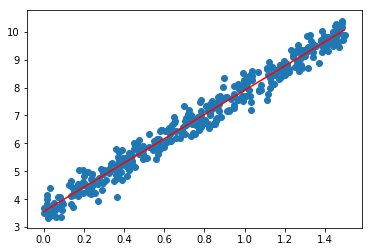

Train MSE: 0.090035


In [157]:
### YOUR CODE HERE - Calculate the the mean squared error and plot the results.
y_pred2=predict_y_linear(w,train2_x,b)
plt.scatter(train2_x,train2_y)
plt.plot(train2_x,y_pred2,color='r')
plt.show()
mse_train=MSE(train2_y,y_pred2)
print('Train MSE: %lf'%(mse_train))

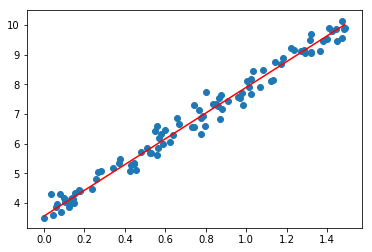

Final MSE: 0.069767


In [158]:
#What's the difference between doing a validation and a 
test2_x=test2[0]
test2_y=test2[1]
y_pred2_test=predict_y_linear(w,test2_x,b)
plt.scatter(test2_x,test2_y)
plt.plot(test2_x,y_pred2_test,color='r')
plt.show()
mse_test=MSE(test2_y,y_pred2_test)
print('Final MSE: %lf'%(mse_test))